<a href="https://colab.research.google.com/github/mohitraosatya/seeqc-swarm-intelligence-routing/blob/main/SEEQC_BOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Define nodes
qubits = [f"Qubit{i}" for i in range(1, 11)]
sfqs = [f"SFQ{i}" for i in range(1, 11)]
intermediate = [f"CTRL{i}" for i in range(1, 6)]
readout = ['Readout']
nodes = qubits + sfqs + intermediate + readout

# Create graph
G = nx.Graph()
G.add_nodes_from(nodes)

# Random weighted connections between SFQs, qubits, and intermediates
for _ in range(70):
    u = random.choice(nodes)
    v = random.choice(nodes)
    if u != v and not G.has_edge(u, v):
        weight = random.randint(1, 10)  # Simulate complexity
        G.add_edge(u, v, weight=weight)


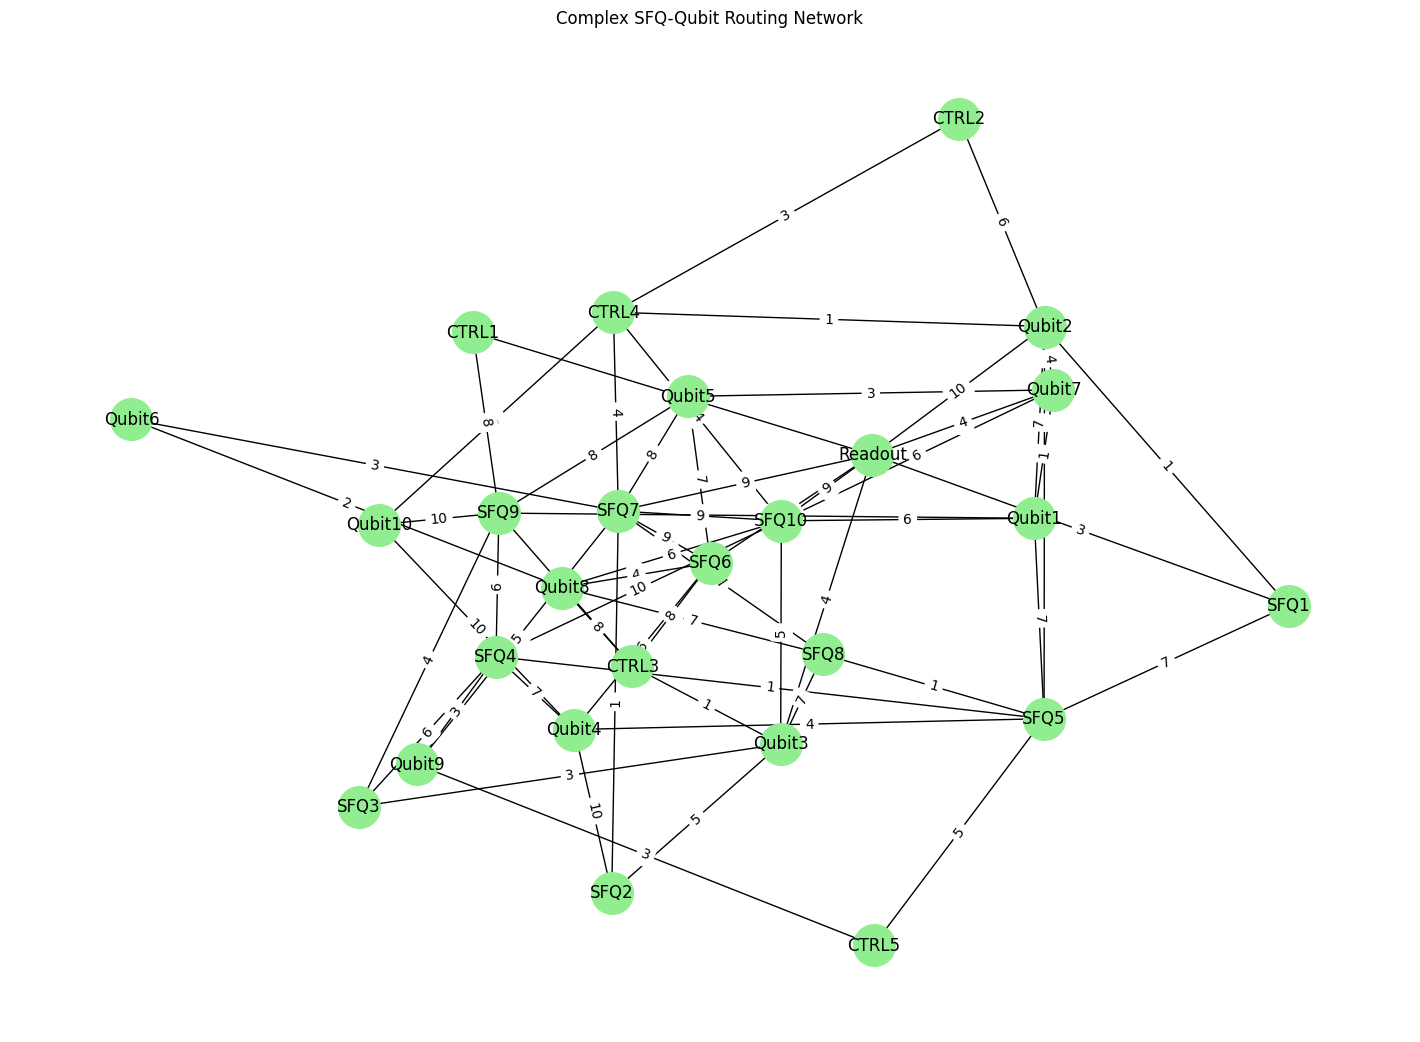

In [2]:
pos = nx.spring_layout(G, seed=42)
weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=900)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title("Complex SFQ-Qubit Routing Network")
plt.show()


In [3]:
def compute_path_cost(path, graph):
    cost = 0
    for i in range(len(path)-1):
        try:
            cost += graph[path[i]][path[i+1]]['weight']
        except:
            cost += 20  # Heavy penalty for bad path
    return cost


In [4]:
# Random baseline (start and end at Readout)
baseline_path = ['Readout'] + random.sample(nodes[:-1], 15) + ['Readout']
initial_complexity = compute_path_cost(baseline_path, G)

print(" Baseline Path:", baseline_path)
print(" Initial Total Circuit Complexity:", initial_complexity)


 Baseline Path: ['Readout', 'Qubit9', 'SFQ9', 'CTRL2', 'SFQ1', 'Qubit2', 'CTRL1', 'Qubit6', 'Qubit3', 'SFQ6', 'SFQ7', 'Qubit4', 'SFQ2', 'Qubit8', 'SFQ8', 'CTRL4', 'Readout']
 Initial Total Circuit Complexity: 267


In [5]:
def enhanced_BOA(graph, iterations=2000, path_length=15):
    best_path = None
    best_cost = float('inf')
    node_pool = nodes[:-1]  # exclude final Readout to avoid duplicates

    for _ in range(iterations):
        candidate_mid = random.sample(node_pool, path_length)
        candidate_path = ['Readout'] + candidate_mid + ['Readout']
        cost = compute_path_cost(candidate_path, graph)

        if cost < best_cost:
            best_cost = cost
            best_path = candidate_path

    return best_path, best_cost


In [6]:
best_path, best_cost = enhanced_BOA(G)
print(" Optimized Path:", best_path)
print(" Optimized Complexity:", best_cost)

 Optimized Path: ['Readout', 'SFQ6', 'Qubit2', 'Qubit1', 'SFQ10', 'CTRL4', 'SFQ7', 'Qubit7', 'SFQ8', 'SFQ5', 'SFQ4', 'CTRL3', 'Qubit3', 'SFQ2', 'Qubit9', 'CTRL1', 'Readout']
 Optimized Complexity: 163


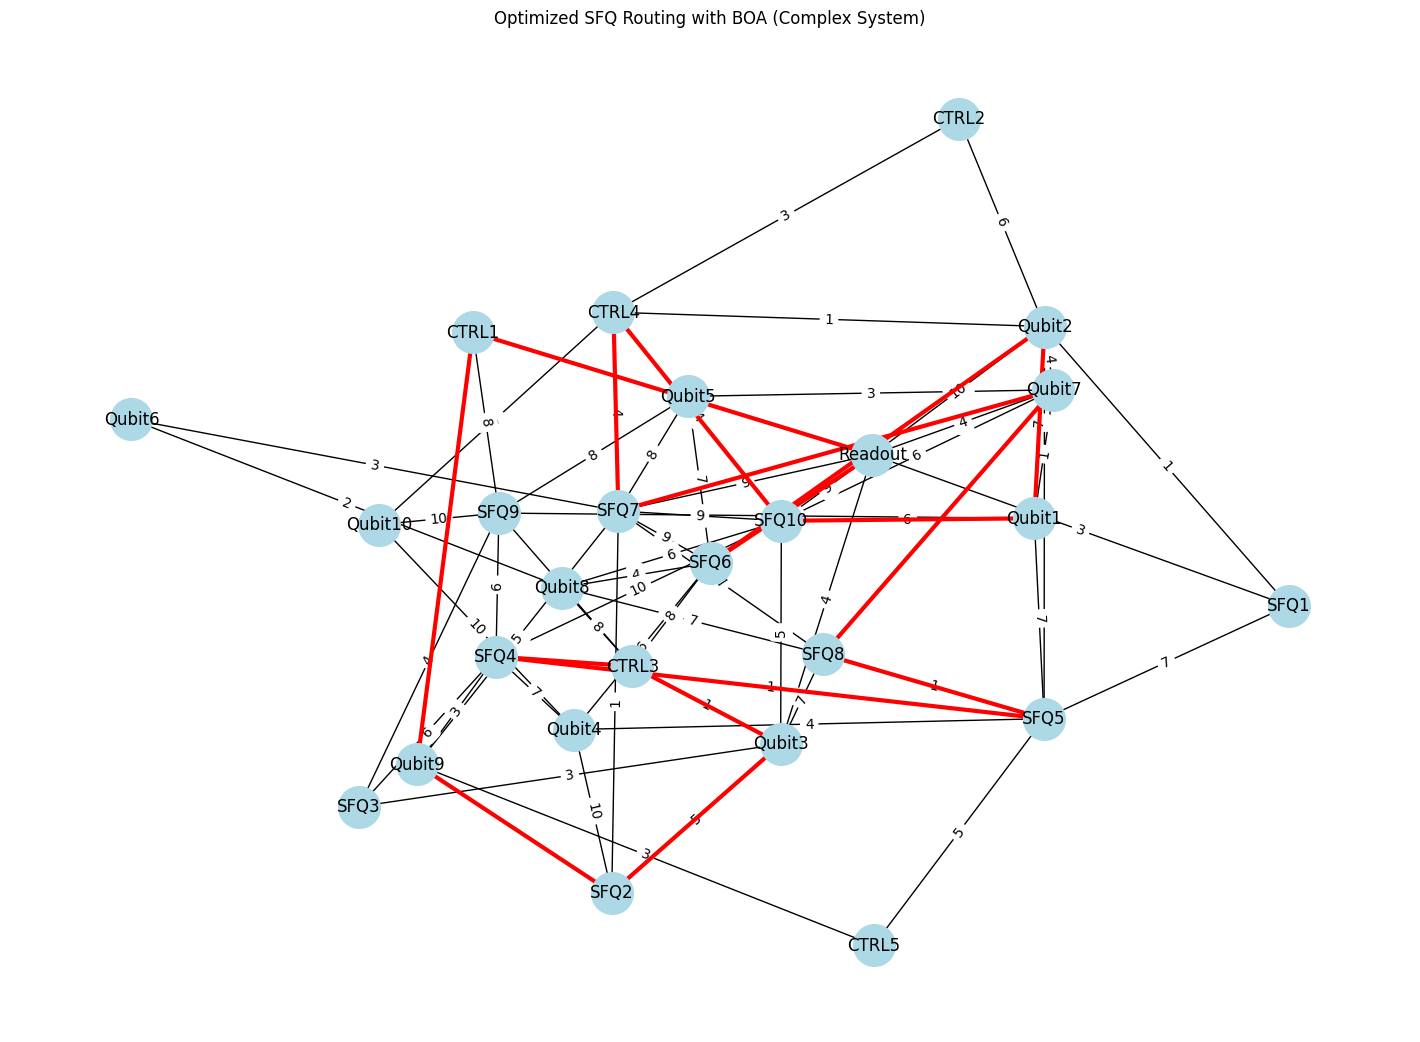

In [7]:
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=900)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

# Highlight path
opt_edges = [(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=opt_edges, edge_color='red', width=3)

plt.title("Optimized SFQ Routing with BOA (Complex System)")
plt.show()

In [8]:
improvement = initial_complexity - best_cost
percent = (improvement / initial_complexity) * 100

print(f"Initial Complexity: {initial_complexity}")
print(f"Optimized Complexity: {best_cost}")
print(f"Improvement: {improvement} ({percent:.2f}%)")

Initial Complexity: 267
Optimized Complexity: 163
Improvement: 104 (38.95%)
